# Data Visualisation with Seaborn
This is a summary of the graph types covered in this notebook. Image credits: [Kaggle](https://www.kaggle.com/alexisbcook/choosing-plot-types-and-custom-styles)

## Imports

In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

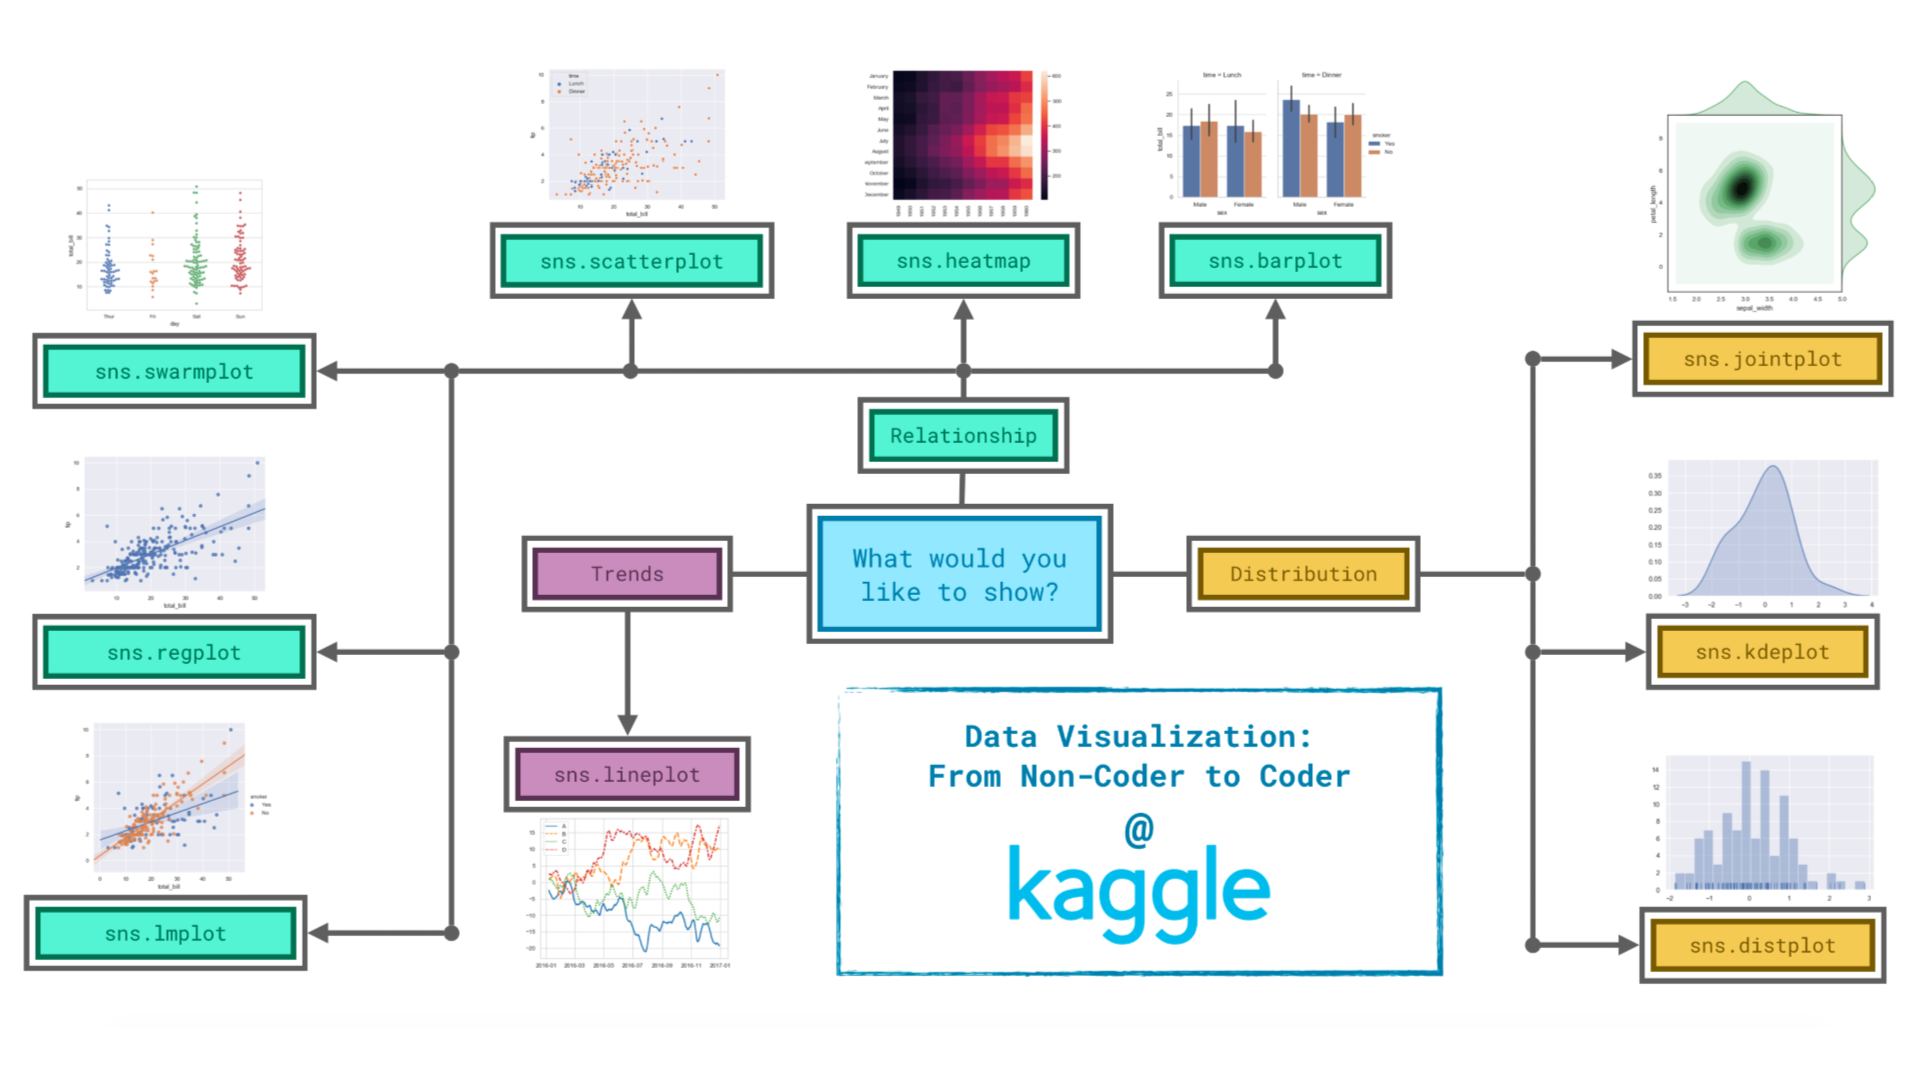

In [2]:
Image("../images/Data Visualisation with Seaborn.png", format='png', unconfined=False)

## Reading data from file
Datasets used:
* Breast cancer dataset
* FIFA ranking dataset

In [3]:
cancer_data = pd.read_csv('breast_cancer_data.csv', index_col='id')
cancer_data.drop(columns=[cancer_data.columns[-1]], inplace=True)
fifa_data = pd.read_csv('fifa_ranking.csv', parse_dates=True, infer_datetime_format=True)
# print(cancer_data.head())
# print(fifa_data.head())

## Trend data
We use seaborn's

    sns.lineplot()
    
function to describe trends, especially time series.

In [4]:
country_list = list(fifa_data.country_full.unique())
fifa_data_bycountry = pd.DataFrame(fifa_data.loc[fifa_data.country_full == 'Germany', ['rank_date', 'rank']])
fifa_data_bycountry.set_index('rank_date', inplace=True)
fifa_data_bycountry.rename(columns={'rank' : 'rank_Germany'}, inplace=True)

for country in country_list[1:]:
    countryDataFrame = pd.DataFrame(fifa_data.loc[fifa_data.country_full == country, ['rank_date', 'rank']])
    countryDataFrame.set_index('rank_date', inplace=True)
    countryDataFrame.rename(columns={'rank' : f'rank_{country}'}, inplace=True)
    fifa_data_bycountry = fifa_data_bycountry.join(countryDataFrame, how='outer')

new_column_list = list()
for rank_Country in fifa_data_bycountry.columns:
    new_column_list.append(rank_Country[5:])

fifa_data_bycountry.columns = new_column_list
                           
fifa_data_bycountry.head()

,Germany,Italy,Switzerland,Sweden,Argentina,Republic of Ireland,Russia,Brazil,Norway,Denmark,...,Afghanistan,New Caledonia,Serbia,Timor-Leste,Comoros,Montenegro,Curaçao,South Sudan,Kosovo,Gibraltar
rank_date,,,,,,,,,,,,,,,,,,,,,
1993-08-08,1,2,3,4,5,6,7,8,9,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-23,5,2,10,11,12,9,8,1,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-10-22,4,3,13,8,9,11,11,1,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-19,3,1,9,11,9,13,14,4,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-23,1,2,12,9,8,10,14,3,4,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


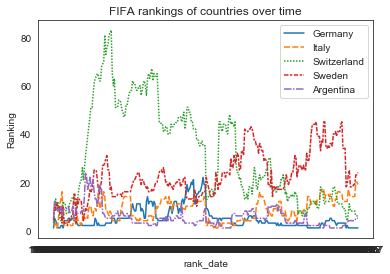

In [5]:
plt.figure()
sns.set_style('white')
plt.title('FIFA rankings of countries over time')
plt.xlabel('Date')
plt.ylabel('Ranking')
sns.lineplot(data=fifa_data_bycountry.iloc[:,:5])
plt.show()

## Relationships data

### Taking a peek at our data
We use the breast cancer dataset to illustrate the different graph types.

In [6]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Scatter plot
We use

    sns.scatterplot
   
to describe the relationship between two (or more variables).

As will be the case for subsequent relationship data graph types, a third variable can be encoded into the graph by specifying the hue, size and style.

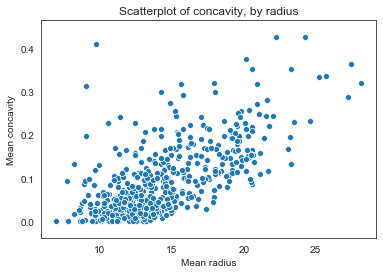

In [21]:
plt.figure()
sns.scatterplot(x=cancer_data.radius_mean,
                y=cancer_data.concavity_mean,
#                 hue=cancer_data.diagnosis,
#                 style=cancer_data.diagnosis,
#                 size=cancer_data.diagnosis
               )
plt.title('Scatterplot of concavity, by radius')
plt.xlabel('Mean radius')
plt.ylabel('Mean concavity')
plt.show()

To increase the amount of information presented in the graph, we can optionally add a third dimension for categorical variables. This may be done by encoding categorical information from this variable into the parameters:

    sns.scatterplot(hue={column_name}, style={column_name}, size={column_name})
   
parameters. Using multiple parameters for the same column names - redundant encoding - makes both groups more visually distinct:

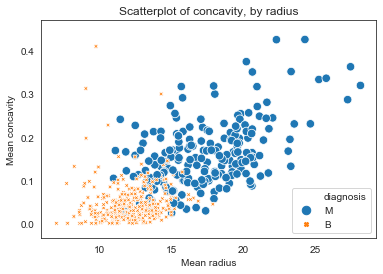

In [8]:
plt.figure()
sns.scatterplot(x=cancer_data.radius_mean,
                y=cancer_data.concavity_mean,
                hue=cancer_data.diagnosis,
                style=cancer_data.diagnosis,
                size=cancer_data.diagnosis
               )
plt.title('Scatterplot of concavity, by radius')
plt.xlabel('Mean radius')
plt.ylabel('Mean concavity')
plt.show()

The use of

    sns.regplot(x, y, data,
                x_ci='ci',
                scatter=True,
                fit_reg=True,
                ci=95,
                order=1,
                logistic=False,
                lowess=False,
                robust=False,
                logx=False,
                label=None,
                color=None,
                marker='o',
                scatter_kws=None,
                line_kws=None,
                ax=None
               )

plots the data, and a linear regression model fit with various options for:

*   n-order polynomial regression, `order=n`
*   logistic regression, `logistic=True`
*   locally weighted linear regression, `lowess=True`
*   logarithmic regression, `logx=True`
    

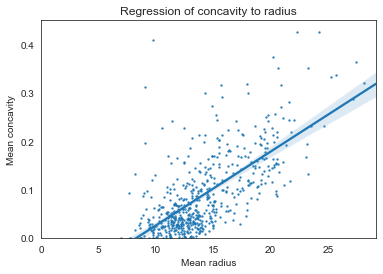

In [23]:
%matplotlib inline

plt.figure()
sns.regplot(x=cancer_data.radius_mean,
            y=cancer_data.concavity_mean,
            scatter_kws={'s' : 2},
            x_ci='ci',
            ci=95,
           )
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('Regression of concavity to radius')
plt.xlabel('Mean radius')
plt.ylabel('Mean concavity')
plt.show()

Combining, in a way, both `sns.scatterplot` and `sns.regplot`, is `sns.lmplot`.

<Figure size 432x288 with 0 Axes>

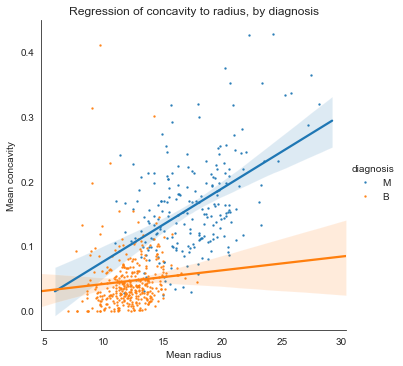

In [24]:
%matplotlib inline

plt.figure()
sns.lmplot(data=cancer_data,
           x='radius_mean',
           y='concavity_mean',
           hue='diagnosis',
           scatter_kws={
               's' : 2 
           }
          )
plt.title('Regression of concavity to radius, by diagnosis')
plt.xlabel('Mean radius')
plt.ylabel('Mean concavity')
plt.show()

Plots of type `sns.lmplot` (i.e., those with categorical variables) can also be visualised using a `sns.swarmplot`, as seen below:

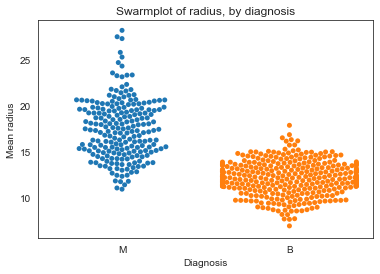

In [25]:
plt.figure()
sns.swarmplot(x=cancer_data.diagnosis,
              y=cancer_data.radius_mean
             )
plt.title('Swarmplot of radius, by diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean radius')
plt.show()

...or a `sns.heatmap`, as seen below:

In [35]:
help(sns.heatmap)

plt.figure()
sns.heatmap(data=cancer_data.set_index('radius_mean').loc[:, 'concavity_mean'])
plt.title('Swarmplot of radius, by diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean radius')
plt.show()

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

IndexError: Inconsistent shape between the condition and the input (got (569, 1) and (569,))

<Figure size 432x288 with 0 Axes>